# Linear Regression on Boston Housing Dataset

This data was originally a part of UCI Machine Learning Repository and has been removed now. This data also ships with the scikit-learn library. 
There are 506 samples and 13 feature variables in this data-set. The objective is to predict the value of prices of the house using the given features.

The description of all the features is given below:

  **CRIM**: Per capita crime rate by town

  **ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft

  **INDUS**: Proportion of non-retail business acres per town

  **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

  **NOX**: Nitric oxide concentration (parts per 10 million)

  **RM**: Average number of rooms per dwelling

  **AGE**: Proportion of owner-occupied units built prior to 1940

  **DIS**: Weighted distances to five Boston employment centers

  **RAD**: Index of accessibility to radial highways

  **TAX**: Full-value property tax rate per $10,000
  
  **PTRATIO** :  pupil-teacher ratio by town

  **B**: 1000(Bk - 0.63)², where Bk is the proportion of [people of African American descent] by town

  **LSTAT**: Percentage of lower status of the population

  **MEDV**: Median value of owner-occupied homes in $1000s




I**mport the required Libraries**

In [113]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

import pandas as pd  
import seaborn as sns 

%matplotlib inline

**Load the Boston Housing DataSet from scikit-learn**

In [204]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()

# boston_dataset is a dictionary
# let's check what it contains
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [97]:
boston_dataset.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

**Load the data into pandas dataframe**

In [205]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


**The target values is missing from the data. Create a new column of target values and add it to dataframe**

In [4]:
boston['MEDV'] = boston_dataset.target

**Data preprocessing**

In [5]:
# check for missing values in all the columns
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [15]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**Data Visualization**

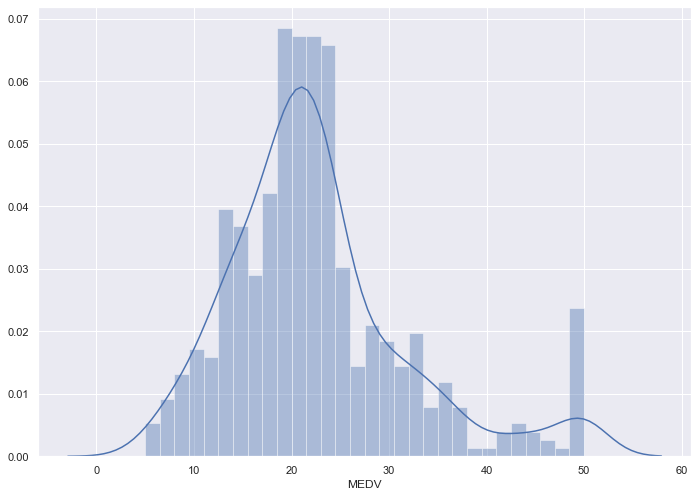

In [6]:
# set the size of the figure
sns.set(rc={'figure.figsize':(11.7,8.27)})

# plot a histogram showing the distribution of the target values
sns.distplot(boston['MEDV'], bins=30)
plt.show()

# or use this
# boston.hist(column=['MEDV'], bins=30, density=True )
# boston['MEDV'].plot.kde()

<AxesSubplot:>

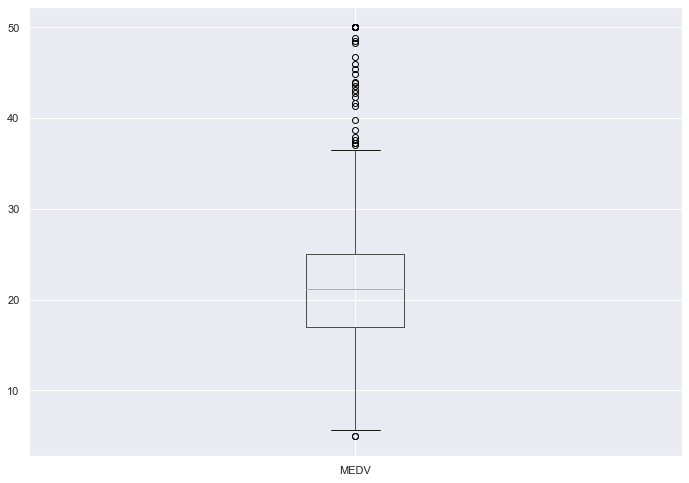

In [32]:
boston.boxplot(column=['MEDV'])

 We see that the values of MEDV are distributed normally with few outliers.

Next, we create a correlation matrix that measures the linear relationships between the variables. The correlation matrix can be formed by using the corr function from the pandas dataframe library. We will use the heatmap function from the seaborn library to plot the correlation matrix.

**Correlation matrix**

In [7]:
# compute the pair wise correlation for all columns  
correlation_matrix = boston.corr().round(2)

<AxesSubplot:>

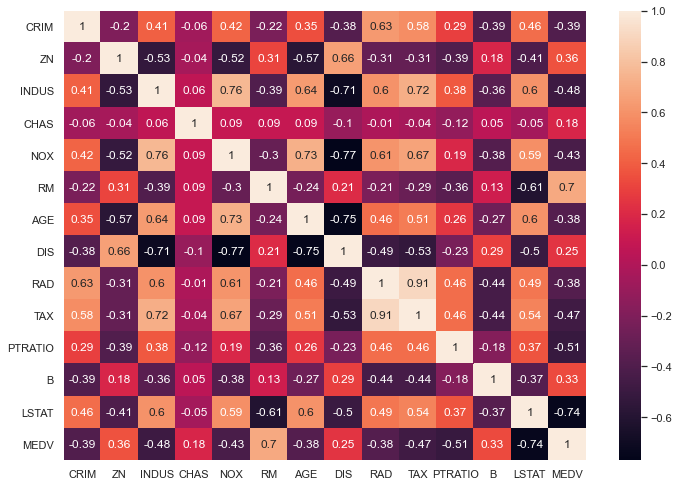

In [8]:
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

**Observations**
*   From the above coorelation plot we can see that **MEDV** is strongly correlated to **LSTAT** (Percentage of lower status of the population), **RM**(Average number of rooms per dwelling)

*  **RAD** and **TAX** are stronly correlated, so we don't include this in our features together to avoid multi-colinearity

**Using a scatter plot let’s see how these features vary with MEDV**

Text(0, 0.5, 'MEDV')

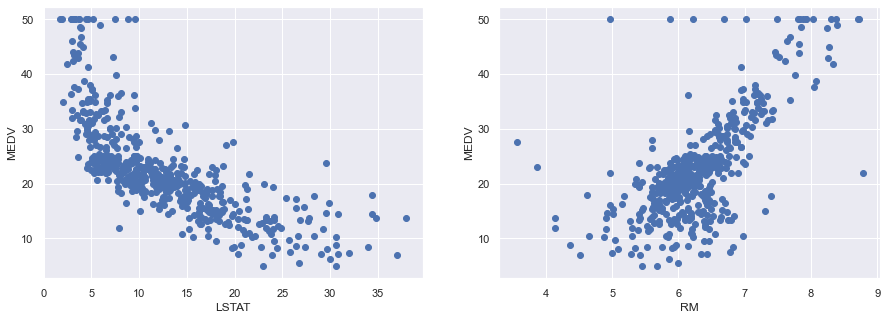

In [99]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, ) # figsize=(20,5)
fig.set_figwidth(15)
fig.set_figheight(5)
ax1.scatter(boston['LSTAT'], boston['MEDV'], edgecolor='b')
ax2.scatter(boston['RM'], boston['MEDV'], edgecolor='b')
ax1.set_xlabel('LSTAT')
ax1.set_ylabel('MEDV')
ax2.set_xlabel('RM')
ax2.set_ylabel('MEDV')

**Observations:**
1. The prices increase as the value of RM increases linearly. There are few outliers and the data seems to be capped at 50.
2. The prices tend to decrease with an increase in LSTAT. Though it doesn’t look to be following exactly a linear line.

**Prepare the data for training**
We concatenate the LSTAT and RM columns using np.c_ provided by the numpy library.

In [115]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
y = boston['MEDV']

In [92]:
type(y)

pandas.core.series.Series

**Split the data into training and testing sets**

In [79]:


# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


**Train the model using sklearn LinearRegression**

In [80]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [81]:
# regression line coefficient and intercept
print(lin_model.coef_)
print(lin_model.intercept_)

[-0.71722954  4.58938833]
2.73624034260661


In [82]:
# model evaluation for testing set

y_test_predict = lin_model.predict(X_test)
# root mean square error of the model
rmse = mean_squared_error(y_test, y_test_predict, squared=False)

# r-squared score of the model
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
# The coefficient of determination: 1 is perfect prediction
print('R2 score / coefficient of determination is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 5.13740078470291
R2 score / coefficient of determination is 0.6628996975186954


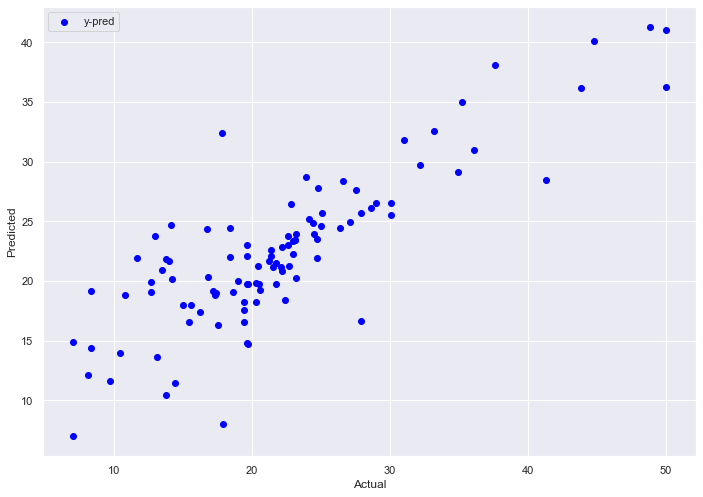

In [106]:

# plotting the y_test vs y_pred
# ideally should have been a straight line with slope '1' passing through 0
plt.scatter(y_test, y_test_predict, color='blue', label='actual vs predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

The model performance for testing set with just LSTAT
--------------------------------------
RMSE is 6.230716573098682
R2 score / coefficient of determination is 0.5041523728903131


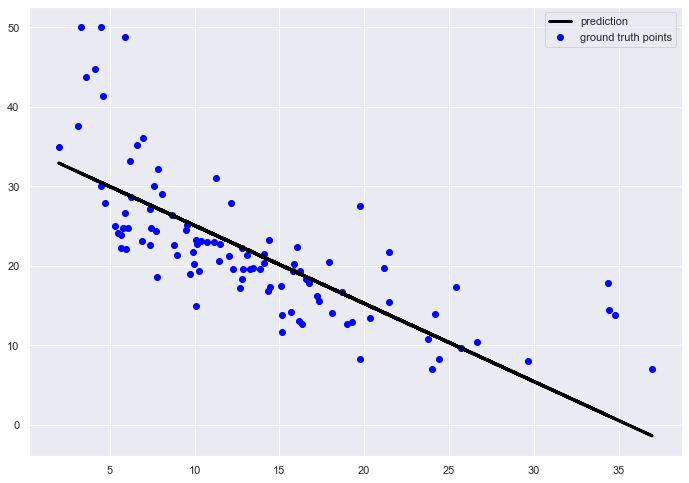

In [111]:
# if we just consider one feature 'LSTAT'
X = pd.DataFrame(boston['LSTAT'])
y = boston['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_test_predict = lin_model.predict(X_test)
rmse = mean_squared_error(y_test, y_test_predict, squared=False)
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set with just LSTAT")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
# The coefficient of determination: 1 is perfect prediction
print('R2 score / coefficient of determination is {}'.format(r2))

plt.scatter(X_test, y_test, color='blue', label='ground truth points')
plt.plot(X_test, y_test_predict, color='black', linewidth=3, label='prediction')
plt.legend()
plt.show()

**Performance increases with just 'RM' feature** as seen below

The model performance for testing set with just LSTAT
--------------------------------------
RMSE is 4.895963186952217
R2 score / coefficient of determination is 0.6938399401553497


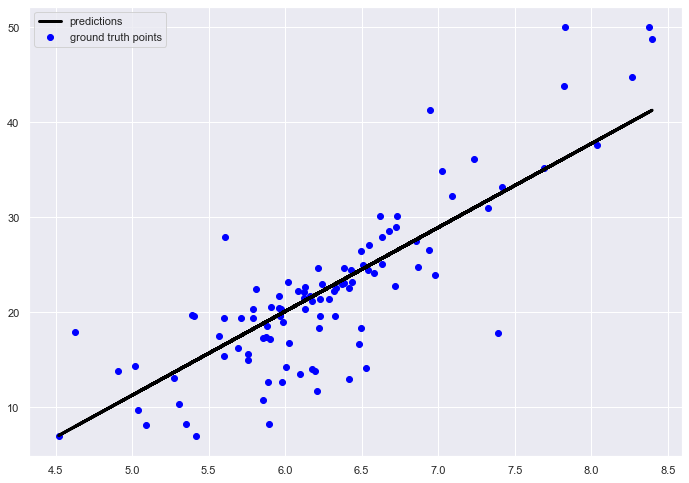

In [110]:
# if we just consider one feature 'RM'
X = pd.DataFrame(boston['RM'])
y = boston['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_test_predict = lin_model.predict(X_test)
rmse = mean_squared_error(y_test, y_test_predict, squared=False)
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set with just LSTAT")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
# The coefficient of determination: 1 is perfect prediction
print('R2 score / coefficient of determination is {}'.format(r2))

plt.scatter(X_test, y_test, color='blue', label='ground truth points')
plt.plot(X_test, y_test_predict, color='black', linewidth=3, label='predictions')
plt.legend()
plt.show()

## **Lets use Polynomial Regression in effect.**

The model performance for testing set with just LSTAT
--------------------------------------
RMSE is 3.78481988454502
R2 score / coefficient of determination is 0.8170372495892197


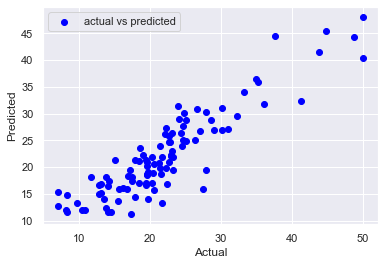

In [126]:
# we will use both LSTAT and RM 
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
y = boston['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
degree=2
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train, y_train)
y_test_predict = polyreg.predict(X_test)
rmse = mean_squared_error(y_test, y_test_predict, squared=False)
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set with just LSTAT")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
# The coefficient of determination: 1 is perfect prediction
print('R2 score / coefficient of determination is {}'.format(r2))

plt.scatter(y_test, y_test_predict, color='blue', label='actual vs predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()


**Previous result with Linear Regression was
RMSE = 5.17
R2 score = .6623
So polynomial has performed better here**

# Another way
https://towardsdatascience.com/machine-learning-project-predicting-boston-house-prices-with-regression-b4e47493633d

## **Using Statsmodels ToDo**
1. https://nsamrao.github.io/Boston_Housing/
2. https://www.learndatasci.com/tutorials/predicting-housing-prices-linear-regression-using-python-pandas-statsmodels/
3. https://statisticsbyjim.com/regression/interpret-coefficients-p-values-regression/#:~:text=Regression%20analysis%20is%20a%20form,correlation%20with%20the%20dependent%20variabled

In [161]:
import statsmodels.api as sm
import numpy as np

In [172]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
# X = boston.drop('MEDV', axis='columns') # if you want to look at all columns
y = boston['MEDV']
X = sm.add_constant(X) # y-intercept 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

As you can see below both scikit and statsmodel provide a R squared of .63-.66 they are close enough

In [173]:
# OLS is the ordinary least square
model = sm.OLS(y, X)
result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Fri, 30 Oct 2020   Prob (F-statistic):          7.01e-112
Time:                        09:59:09   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3583      3.173     -0.428      0.669      -7.592       4.875
LSTAT         -0.6424      0.044    -14.689      0.000      -0.728      -0.556
RM             5.0948      0.444     11.463      0.000       4.222       5.968
==============================================================================
Omnibus:                      145.712   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              457.690
Skew:                           1.343   Prob(JB):                    4.11e-100
Kurtosis:                       6.807   Cond. No.                         202.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. __Adj. R-squared__ indicates that 95% of housing prices can be explained by our predictor variables LSTAT and RM
2. __The regression coefficient (coef)__ represents the change in the dependent variable resulting from a one unit change in the predictor variable, all other variables being held constant. 
3. __std err__ reflects the level of accuracy of the coefficients. The lower it is, the higher is the level of accuracy
4. __p-value__ : The null hypothesis in regression states that there is no relation between IV(each IV) and the DV. If p is < significance level(0.005) then we can reject the NUll Hypothesis and state that there is correlation between IV and DV. It is standard practice to use the coefficient p-values to decide whether to include variables in the final model. 
https://statisticsbyjim.com/regression/interpret-coefficients-p-values-regression/#:~:text=Regression%20analysis%20is%20a%20form,correlation%20with%20the%20dependent%20variable
5. The __confidence interval__ is a range within which our coefficient is likely to fall.

The model performance 
--------------------------------------
RMSE is 1.0218026276396725e-14
R2 score / coefficient of determination is 1.0


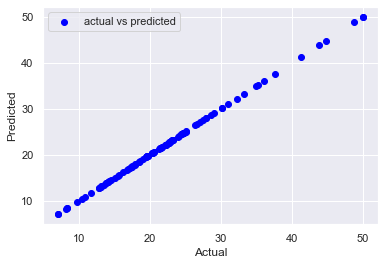

In [174]:
# include more features based on the above stats
X = boston.drop(['CRIM', 'INDUS', 'NOX', 'AGE', 'RAD', 'TAX', 'CHAS'], axis='columns')
y = boston['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
degree=2
reg = LinearRegression()
reg.fit(X_train, y_train)
y_test_predict = reg.predict(X_test)
rmse = mean_squared_error(y_test, y_test_predict, squared=False)
r2 = r2_score(y_test, y_test_predict)

print("The model performance ")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
# The coefficient of determination: 1 is perfect prediction. most of the times it means the model is overfitting.
print('R2 score / coefficient of determination is {}'.format(r2))

plt.scatter(y_test, y_test_predict, color='blue', label='actual vs predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()